<a href="https://colab.research.google.com/github/code-adi56/Coal-consumption/blob/main/coal_consumption_svr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

df = pd.read_csv("energy.csv")
df.head()

,Unnamed: 0,Year,Entity,Code,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,...,Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity),Fossil fuels (% electricity),Low-carbon electricity (% electricity),Nuclear (% electricity).1,Renewables (% electricity),Access to electricity (% of population)
0,0,1965,India,IND,146.995250,2.372522,413.407682,0.0,53.241536,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1966,India,IND,164.149813,2.663272,412.415691,0.0,55.598552,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1967,India,IND,169.360364,3.558783,419.285587,0.0,62.215381,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1968,India,IND,189.771047,3.954203,433.825064,0.0,71.803031,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1969,India,IND,227.929016,4.745044,460.841576,0.0,79.721129,2.013284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop("Entity", axis=1)
df = df.drop("Code", axis=1)
df.head()
df = df.fillna(0)
df = df.replace(np.nan, 0)
df.head()

,Unnamed: 0,Year,Oil Consumption - EJ,Gas Consumption - EJ,Coal Consumption - EJ,Solar Consumption - EJ,Hydro Consumption - EJ,Nuclear Consumption - EJ,Wind Consumption - EJ,Geo Biomass Other - EJ,...,Solar (% electricity),Wind (% electricity),Oil (% electricity),Nuclear (% electricity),Other renewables (% electricity),Fossil fuels (% electricity),Low-carbon electricity (% electricity),Nuclear (% electricity).1,Renewables (% electricity),Access to electricity (% of population)
0,0,1965,146.995250,2.372522,413.407682,0.0,53.241536,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1966,164.149813,2.663272,412.415691,0.0,55.598552,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1967,169.360364,3.558783,419.285587,0.0,62.215381,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1968,189.771047,3.954203,433.825064,0.0,71.803031,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1969,227.929016,4.745044,460.841576,0.0,79.721129,2.013284,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Assuming you have a DataFrame called df
"""columns_to_delete = ['Oil Consumption - EJ', 'Gas Consumption - EJ', 'Coal Consumption - EJ','Hydro Consumption - EJ','Nuclear Consumption - EJ','Wind Consumption - EJ','Geo Biomass Other - EJ','Biofuels (TWh)','Access to clean fuels and technologies for cooking  (% of population)'
,'Access to clean fuels and technologies for cooking  (% of population)','Annual change primary energy consumption (%)','Annual CO2 emissions per unit energy (kg per kilowatt-hour)'
,'Electricity Generation (TWh)','Electricity from coal (TWh)','Electricity from gas (TWh)','Electricity from hydro (TWh)','Electricity from other renewables (TWh)','Electricity from oil (TWh)',
'Electricity from wind (TWh)','Electricity from nuclear (TWh)','Energy consumption per GDP (kWh per $)','Fossil fuels (% sub energy)','Low-carbon energy (% sub energy)','Nuclear (% sub energy)','Per capita electricity (kWh)','Energy consumption per capita (kWh)','Primary energy consumption (TWh)'
,'Coal (% electricity)','Gas (% electricity)','Hydro (% electricity)','Wind (% electricity)','Oil (% electricity)','Nuclear (% electricity)','Other renewables (% electricity)','Fossil fuels (% electricity)','Low-carbon electricity (% electricity)','Nuclear (% electricity)','Renewables (% electricity)']

# Delete the specified columns"""
selected_columns = ['Year', 'Coal Consumption - EJ', 'Electricity from coal (TWh)','Coal (% electricity)']

# Delete all columns except the selected ones
columns_to_delete = df.columns.difference(selected_columns)

df = df.drop(columns=columns_to_delete)
print(df)


    Year  Coal Consumption - EJ  Electricity from coal (TWh)  \
0   1965             413.407682                      0.00000   
1   1966             412.415691                      0.00000   
2   1967             419.285587                      0.00000   
3   1968             433.825064                      0.00000   
4   1969             460.841576                      0.00000   
5   1970             436.809226                      0.00000   
6   1971             442.872556                      0.00000   
7   1972             467.683461                      0.00000   
8   1973             461.449776                      0.00000   
9   1974             520.856519                      0.00000   
10  1975             559.906650                      0.00000   
11  1976             583.035299                      0.00000   
12  1977             610.346656                      0.00000   
13  1978             590.664585                      0.00000   
14  1979             627.493385         

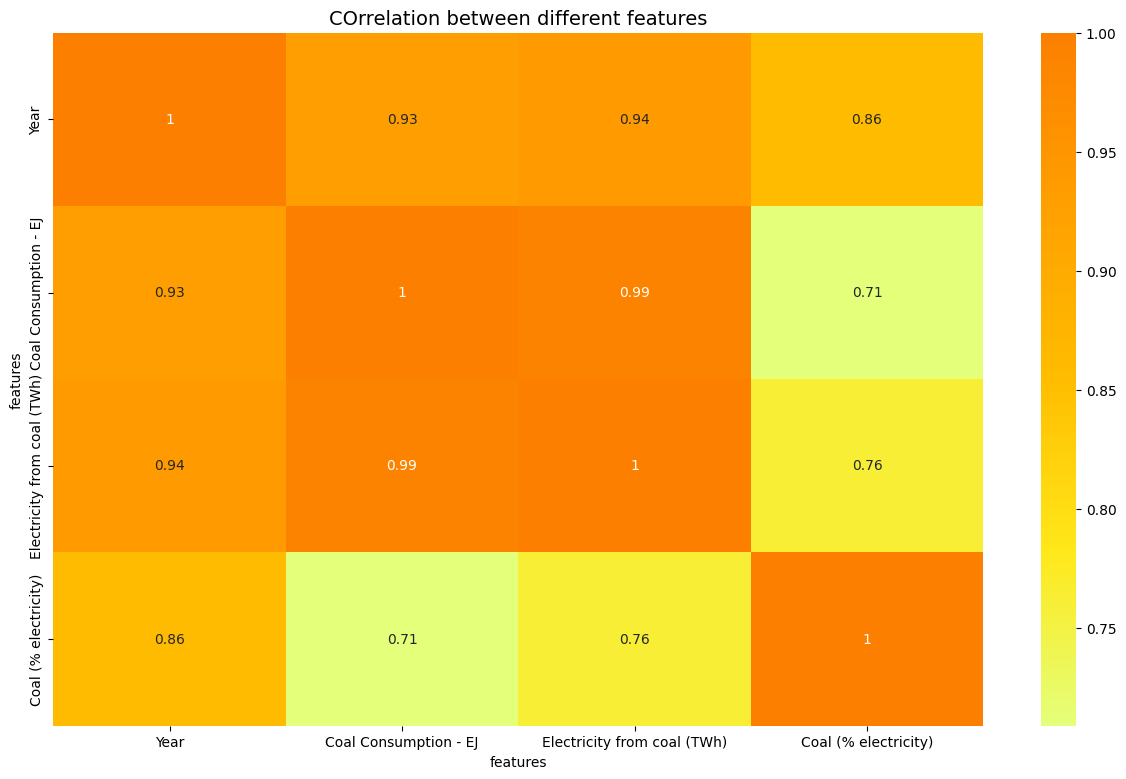

R-squared score: -0.4006335757129065


In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(df.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()
X = df.drop('Coal Consumption - EJ',axis=1)
Y= df['Coal Consumption - EJ']
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=0)
regressor = SVR(kernel='rbf')
regressor.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(Y_test, Y_pred)
print("R-squared score:", r2)

In [ ]:
Y_pred



array([1135.64013082, 1133.99459451, 1134.71642148, 1133.04692468,
       1131.43713193, 1131.43385831, 1133.91386567, 1135.21800512,
       1135.99108932, 1133.68346492, 1131.43456996, 1131.43675916,
       1133.34669277, 1132.58515398, 1133.8086826 , 1137.48450415,
       1134.35905357])